<a href="https://colab.research.google.com/github/mayankdeshmukh/Data-Science-and-Machine-Learning/blob/main/Movie_Rating_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [ ]:
movies = pd.read_csv("/content/Movie-Ratings.csv")

In [ ]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


#EDA - Exploratory Data Analysis

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (million $)         559 non-null    int64 
 5   Year of release            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [ ]:
movies.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [ ]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [ ]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'Budget', 'Year']

In [ ]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [ ]:
movies.Year = movies.Year.astype('category')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    object  
 1   Genre            559 non-null    object  
 2   CriticRatings    559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budget           559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(1), int64(3), object(2)
memory usage: 22.7+ KB


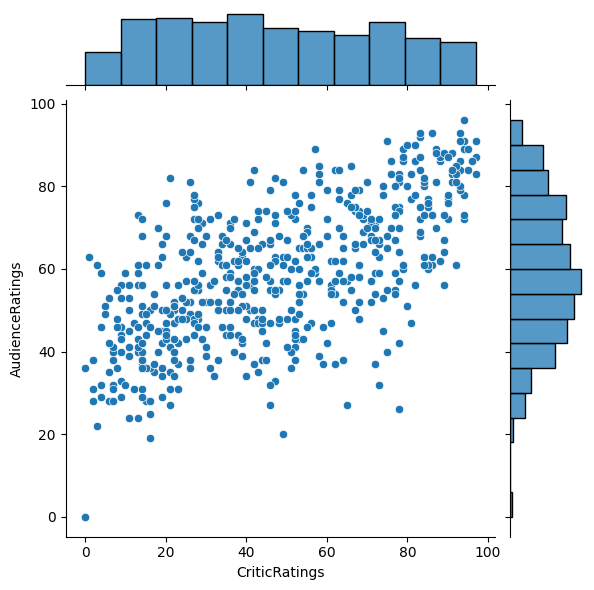

In [ ]:
sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings')

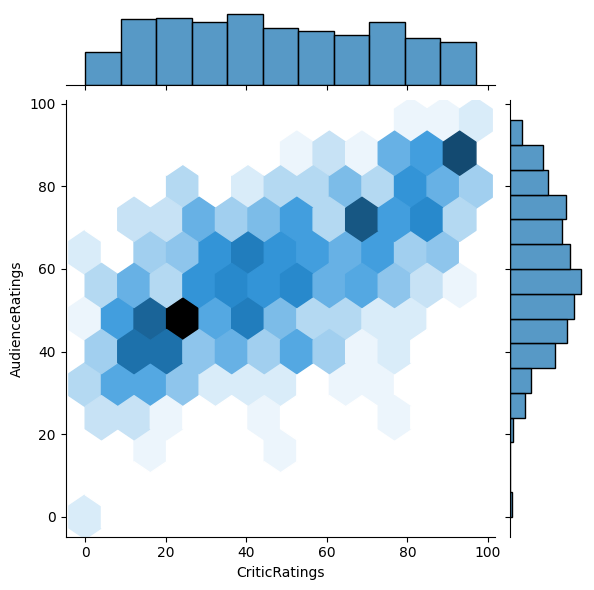

In [ ]:
sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings', kind = 'hex')

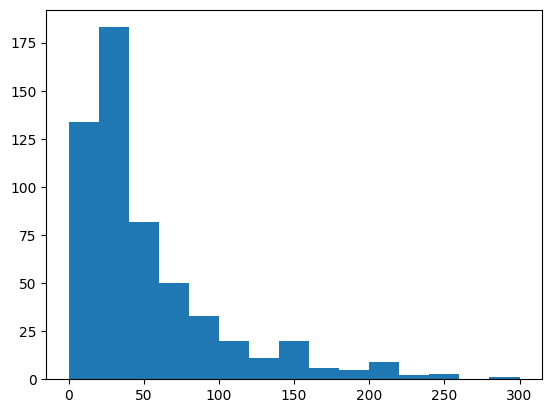

In [ ]:
plt.hist(movies.Budget, bins = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

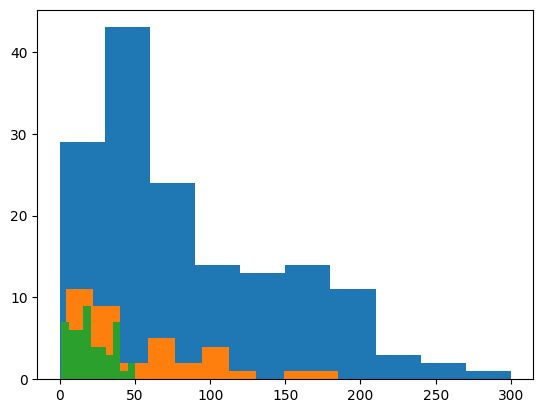

In [ ]:
plt.hist(movies[movies.Genre == 'Action'].Budget)
plt.hist(movies[movies.Genre == 'Thriller'].Budget)
plt.hist(movies[movies.Genre == 'Horror'].Budget)
plt.show

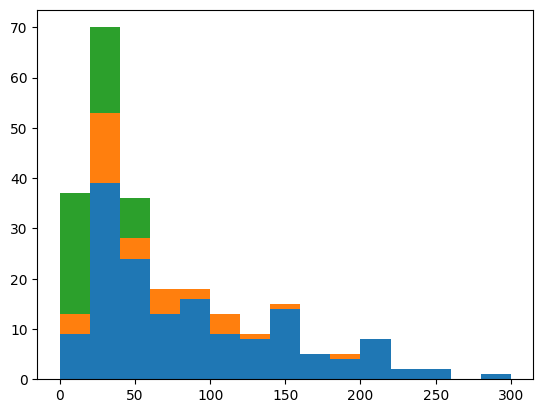

In [ ]:
plt.hist([movies[movies.Genre == 'Action'].Budget, movies[movies.Genre == 'Thriller'].Budget, movies[movies.Genre == 'Horror'].Budget], stacked = True, bins = 15)
plt.show()

In [ ]:
movies.Genre = movies.Genre.astype('category')

In [ ]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [ ]:
for gen in movies.Genre.cat.categories:
  print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


<function matplotlib.pyplot.show(close=None, block=None)>

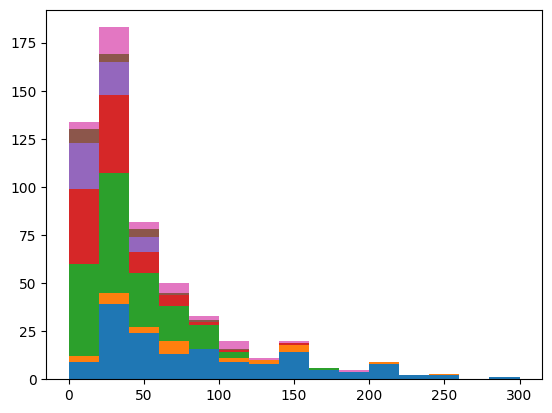

In [ ]:
list1 = list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].Budget)

plt.hist(list1, stacked = True, bins = 15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

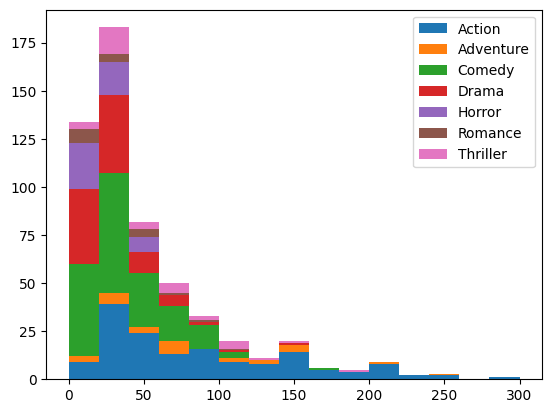

In [ ]:
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].Budget)
  mylabels.append(gen)

plt.hist(list1, stacked = True, bins = 15, label = mylabels)
plt.legend()
plt.show